### 1) Import required modules

In [20]:
import pandas                   as     pd
import numpy                    as     np
import seaborn                  as     sns
import matplotlib.pyplot        as     plt
import statsmodels.api          as     sm
from   sklearn.preprocessing    import OrdinalEncoder
from   sklearn                  import metrics
from   sklearn                  import tree
import sys, os
import os
os.chdir(r'D:\DrPKV\20220618')

In [21]:
import time
from    datetime   import datetime
from    datetime   import timedelta

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [24]:
### Explore the algorithm wrapped by RFE
from numpy                       import mean
from numpy                       import std
from sklearn.datasets            import make_classification
from sklearn.model_selection     import cross_val_score
from sklearn.model_selection     import RepeatedStratifiedKFold
from sklearn.feature_selection   import RFE
from sklearn.feature_selection   import RFECV
from sklearn.linear_model        import LogisticRegression
from sklearn.linear_model        import Perceptron
from sklearn.tree                import DecisionTreeClassifier
from sklearn.ensemble            import RandomForestClassifier
from sklearn.ensemble            import GradientBoostingClassifier
from sklearn.pipeline            import Pipeline
from matplotlib                  import pyplot as plt
### ####  

Ref: https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [25]:
### ------- -------------- -------------- -----------
### get a list of models to evaluate
### ------- -------------- -------------- -----------
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # CART / Decision Tree
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Gradient Boosting 
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

### 2) Read data file

In [26]:
inp_file_name =  './Output/Bankruptcy-imputed-data-2022_06_18_18_10_31.csv'
df1           =  pd.read_csv(inp_file_name)
df1.columns

Index(['Row', 'Year', 'Year Encoded', 'Target', 'Asset_turnover',
       'Receivable_turnover(new)', 'Inventory_turnover', 'Cash_ratio',
       'Quick_ratio', 'Current_ratio', 'ROA(new)', 'ROE(new)', 'ROS(new)',
       'debt_asset', 'debt_equity', 'debt_income', 'Interest_coverage',
       'Asset_coverage', 'EBIT_Sales', 'Sales_CE', 'ROCE_CE',
       'Changeinsales_Industry', 'Grossvaluedadded', 'Ln_GVA',
       'Operating Cash Flow/Total Sales', 'Operating Cash Flow/Total Debt',
       'Operating Cash Flow/Shareholder's Equity',
       'Fixed Asset Turnover Ratio', 'YOY Sales Growth Rate',
       'YOY EBIT Growth Rate', 'Total shareholders' funds', 'Company_name'],
      dtype='object')

In [27]:
df1.head().T

,0,1,2,3,4
Row,1.00000,1.00000,1.00000,1.00000,1.00000
Year,2010.00000,2011.00000,2012.00000,2013.00000,2014.00000
Year Encoded,-8.00000,-7.00000,-6.00000,-5.00000,-4.00000
Target,1.00000,1.00000,1.00000,1.00000,1.00000
Asset_turnover,0.00000,0.75666,1.07063,1.18632,1.42893
Receivable_turnover(new),0.00000,3.46077,3.95393,4.54417,6.10799
Inventory_turnover,0.00000,0.00000,0.00000,0.00000,0.00000
Cash_ratio,2.01764,1.55843,0.85337,0.96842,1.21196
Quick_ratio,1.55202,1.08407,0.38471,0.37537,0.61504
Current_ratio,3.73717,3.03393,2.56104,2.98033,3.18905


### Observations

We shall remove the variable, Row which denotes "Company Code" and also the variables, Year, Company_name.

In [28]:
 unwanted_variables  =  ['Row', 'Company_name', 'Year']
 df1.drop(unwanted_variables, inplace = True, axis = 1)          

### 3) Perform feature selection

*Recursive Feature Elimination, or RFE for short*, is a popular feature selection algorithm in a dataset that are more or most relevant in predicting the target variable.

**RFE** applies a backward selection process to find the best combination of features. This is done as follows:
* 1) Builds a model based on all features and calculates the importance of each feature in the model.
* 2) It ranks the features and removes the feature(s) with the least importance iteratively based on model evaluation
metrics such as accuracy ratio.

Ref. https://towardsdatascience.com/effective-feature-selection-recursive-feature-elimination-using-r-148ff998e4f7

In [29]:
# define dataset
y             =    df1['Target']
X             =    df1.drop(['Target'], axis = 1)                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (9000, 28)
y dimension (9000,)


>lr 0.839 (0.017)
>per 0.836 (0.015)
>cart 0.854 (0.011)
>rf 0.845 (0.010)
>gbm 0.869 (0.011)


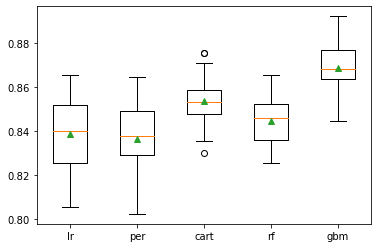

In [30]:
### get the models to evaluate
models = get_models()

### evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Observations

In this case, the results suggest that gradient Boosting algorithm might select better better features more reliably than linear algorithms like logistic regression and ensemble of decision tree algorithms.

### Automatically select the number of features

It is also possible to automatically select the number of features chosen by RFE.

Using the RFECV class, This can be achieved by performing cross-validation evaluation of different numbers of features and
automatically selecting the number of features that resulted in the best mean score.

The RFECV is configured by specifying the minimum number of features via the “min_features_to_select” argument (defaults to 1) 
and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) 
and “scoring” arguments (uses accuracy for classification).

In [31]:
### create pipeline
rfe      = RFE(estimator=GradientBoostingClassifier(), n_features_to_select = 10)
model    = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
### evaluate model
cv       = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.873 (0.010)


In [32]:
collist = X.columns

In [33]:
# define RFE
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select = 10)
# fit RFE
rfe.fit(X, y)
# summarize all features

sno_L        =    list()
support_text =    list()
rank_list    =    list()

for i in range(X.shape[1]):
    sno_L.append(i)
    support_text.append(rfe.support_[i])
    rank_list.append(rfe.ranking_[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 6.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 7.000
Column: 7, Selected False, Rank: 10.000
Column: 8, Selected False, Rank: 18.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 9.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 15.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 4.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 5.000
Column: 20, Selected False, Rank: 13.000
Column: 21, Selected False, Rank: 14.000
Column: 22, Selected False, Rank: 8.000
Column: 23, Selected False, Rank: 17.000
Column: 24, Selected False, Rank: 16.000
Column: 25

### 4) Report the importanct features

In [34]:
df_imp       =    pd.DataFrame({'Sno' : sno_L, 'Selected?' : support_text, 'Rank' : rank_list, 'Columns' : collist })

In [35]:
df_imp

,Sno,Selected?,Rank,Columns
0,0,True,1,Year Encoded
1,1,False,3,Asset_turnover
2,2,False,6,Receivable_turnover(new)
3,3,True,1,Inventory_turnover
4,4,True,1,Cash_ratio
5,5,True,1,Quick_ratio
6,6,False,7,Current_ratio
7,7,False,10,ROA(new)
8,8,False,18,ROE(new)
9,9,True,1,ROS(new)


In [36]:
imp_variables_df  =  df_imp.loc[df_imp['Selected?'] == True, 'Columns']

In [37]:
imp_variables_df

0                  Year Encoded
3            Inventory_turnover
4                    Cash_ratio
5                   Quick_ratio
9                      ROS(new)
11                  debt_equity
12                  debt_income
17                      ROCE_CE
18       Changeinsales_Industry
27    Total shareholders' funds
Name: Columns, dtype: object

In [38]:
Reqd_cols        =  ["Target", "Year Encoded", "Inventory_turnover","Cash_ratio","Quick_ratio","ROS(new)", "debt_equity", "debt_income",\
                     "ROCE_CE", "Changeinsales_Industry","Total shareholders' funds"]
new_df           =   df1.loc[:, Reqd_cols]
output_file_name =  './Output/Bankruptcy-IMPORTED-data-' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv'
new_df.to_csv(output_file_name, index = False)

### END